<h3>Predicting players rating</h3>
<p>In this project I am going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.
<p>The dataset I am going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

<h3>About the Dataset</h3>
<p>The ultimate Soccer database for data analysis and machine learning
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch.

<li>+25,000 matches
<li>+10,000 players
<li>11 European Countries with their lead championship
<li>Seasons 2008 to 2016
<li>Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
<li>Team line up with squad formation (X, Y coordinates)
<li>Betting odds from up to 10 providers

<p>Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches
The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset.
    
<h3>Importing Required Modules</h3>

In [46]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as statsmodels

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score, make_scorer

import math
from math import sqrt

<h3>Data Pre-Processing</h3>

In [47]:
#Creates a connection with database.sqlite db
conn = sqlite3.connect('database.sqlite')

#Reads sql statement from Player_Attributes from Pandas and put into dataframe for further data exploration and processing
df = pd.read_sql_query('select * from Player_Attributes',conn)

<h3>Data Exploration</h3>

In [48]:
#df.head(10) return first 10 rows of the data frame and transpose converts rows to column
#This gives very good view of data through which we can observe columns/features, their values and data types, etc.
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
id,1,2,3,4,5,6,7,8,9,10
player_fifa_api_id,218353,218353,218353,218353,218353,189615,189615,189615,189615,189615
player_api_id,505942,505942,505942,505942,505942,155782,155782,155782,155782,155782
date,2016-02-18 00:00:00,2015-11-19 00:00:00,2015-09-21 00:00:00,2015-03-20 00:00:00,2007-02-22 00:00:00,2016-04-21 00:00:00,2016-04-07 00:00:00,2016-01-07 00:00:00,2015-12-24 00:00:00,2015-12-17 00:00:00
overall_rating,67,67,62,61,61,74,74,73,73,73
potential,71,71,66,65,65,76,76,75,75,75
preferred_foot,right,right,right,right,right,left,left,left,left,left
attacking_work_rate,medium,medium,medium,medium,medium,high,high,high,high,high
defensive_work_rate,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium
crossing,49,49,49,48,48,80,80,79,79,79


In [49]:
#Second thing we need to know about columns or features of a particular database which can be achieved by df.columns
df.columns 

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [50]:
#Statistical summary of the dataframe df or data

#Count     : Number of rows per column or feature contains.
#mean      : Average value for a particular column.
#std       : Standard deviation is SqaureRoot(Summation(x-x_bar))
#50%       : The median and it's difference from the mean gives information on the skew of the distribution. 
#            It's also another definition of average that is robust to outliers in the data.
#25% & 75% : Perspective on the kurtosis. All percentile numbers are generally more robust to outliers.


df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [51]:
#Return a tuple representing the dimensionality of the DataFrame df.
#In this tuple, first entity represents number of rows and second entity represents number of columns
df.shape 

(183978, 42)

<h3>Data Visualization</h3>

<h5>Histogram Plot</h5>

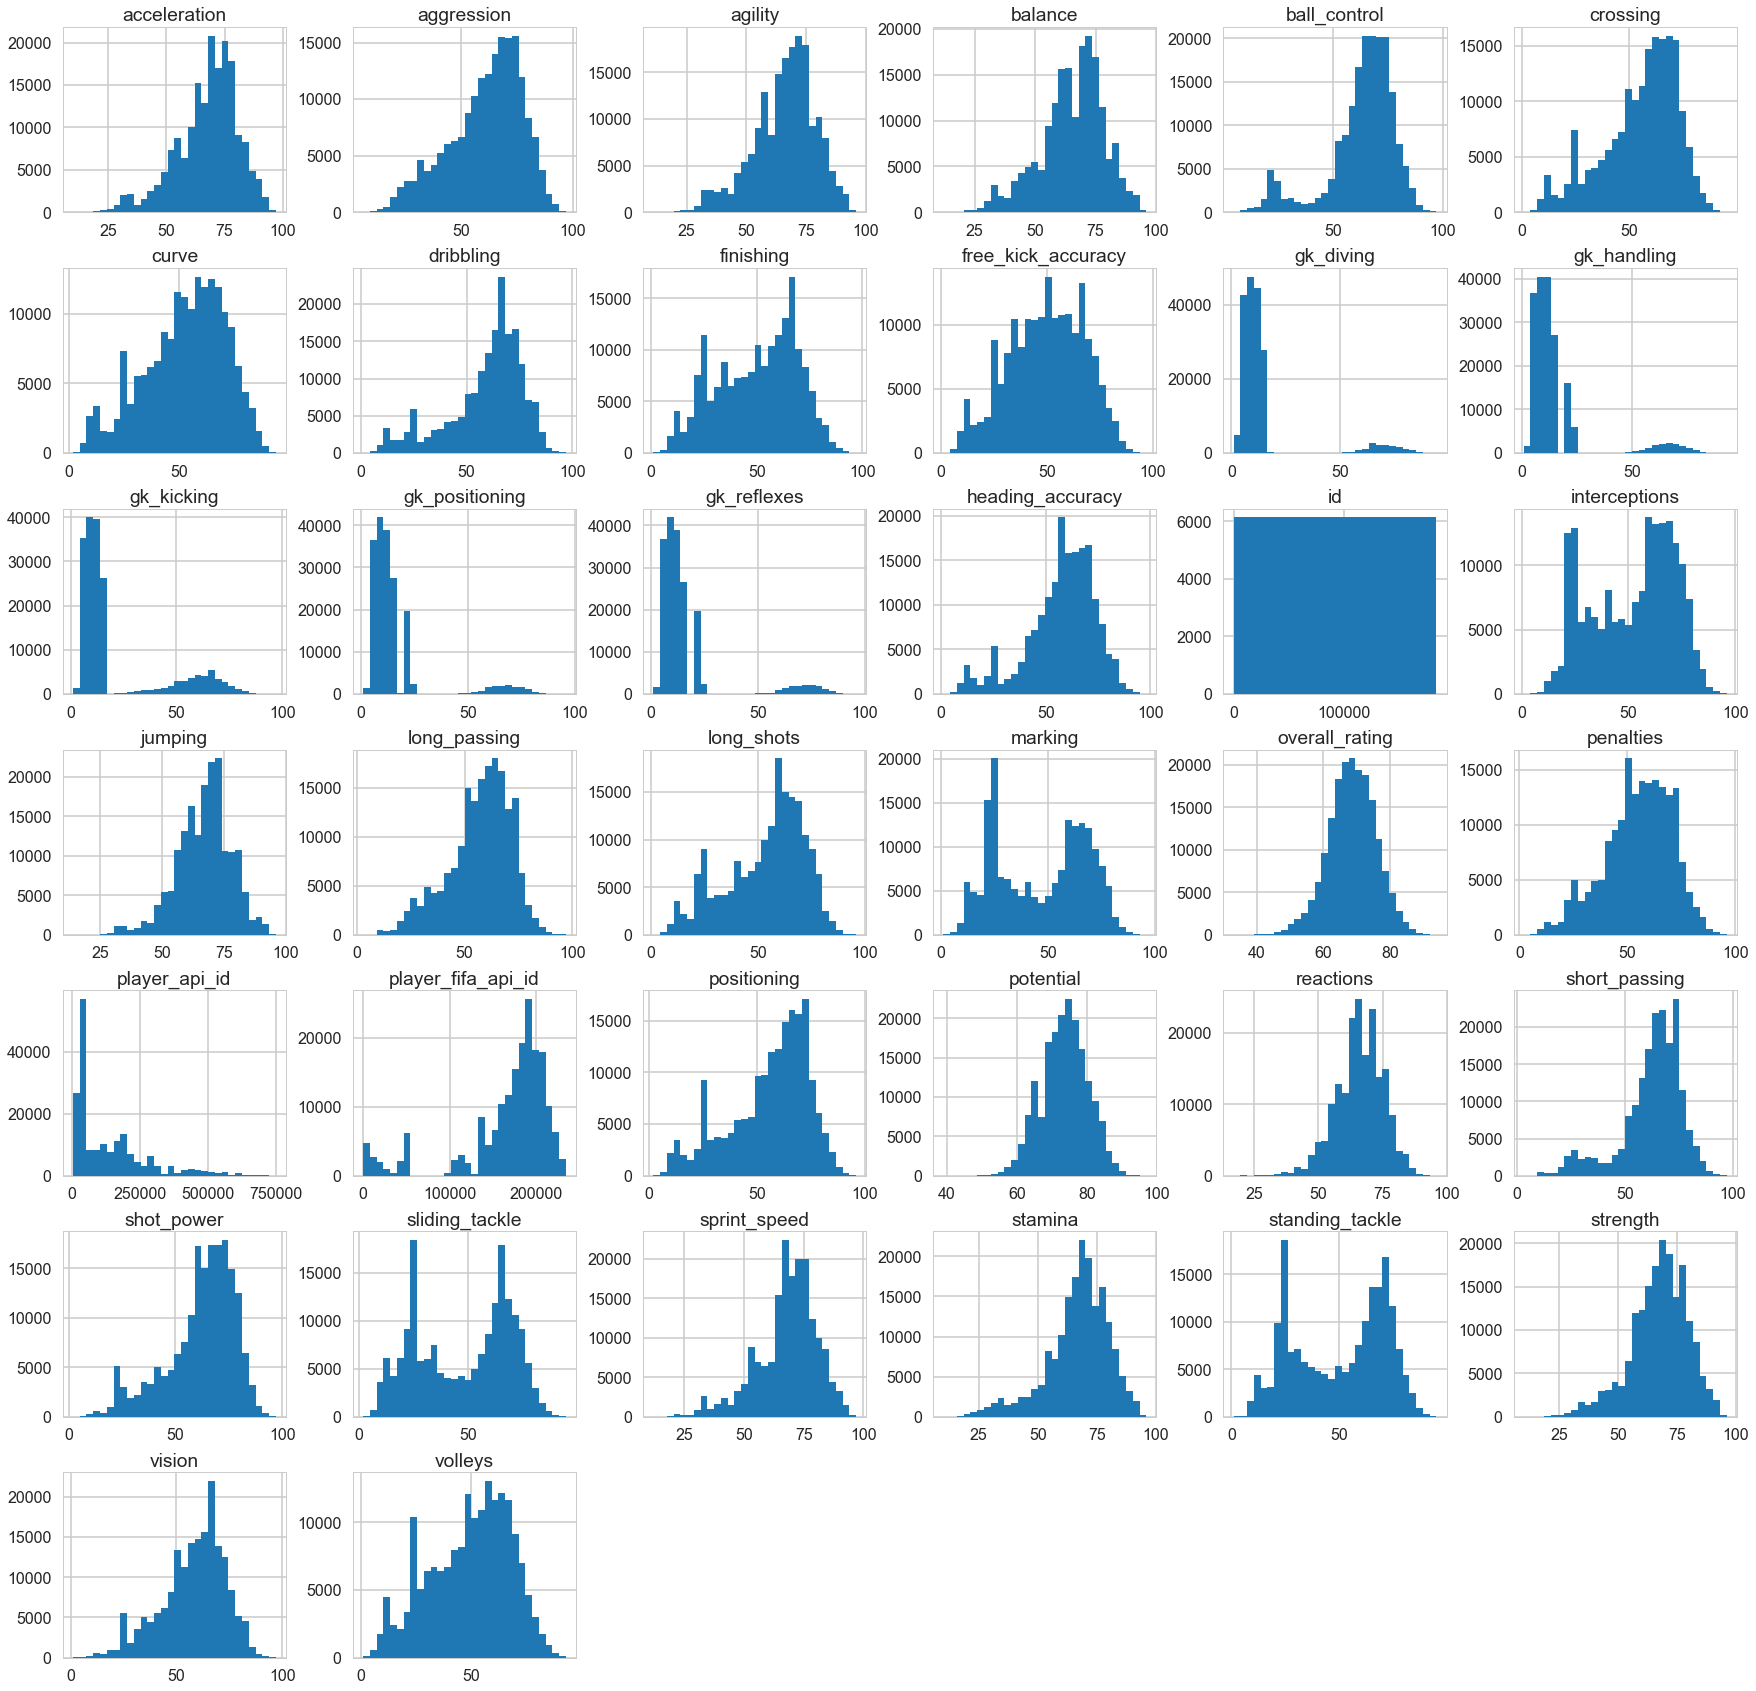

In [52]:
# Visual Analysis of the Dataset
df.hist(bins=30, figsize=(30,30))
plt.show()

In [53]:
#Corelations 
df.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003368,0.001987,-0.002875,0.001217,-0.019149,-0.007882,-0.011295,-0.006132,-0.006343,...,-0.007731,-0.010620,-0.009555,-0.012196,-0.010689,0.013980,0.010436,0.008645,0.013563,0.014152
player_fifa_api_id,0.003368,1.000000,0.554620,-0.274089,-0.027619,-0.064183,-0.028010,-0.104655,-0.064219,-0.087743,...,-0.164171,-0.182479,-0.077979,-0.073212,-0.054321,-0.091737,-0.143113,-0.267489,-0.145119,-0.135443
player_api_id,0.001987,0.554620,1.000000,-0.322389,0.010991,-0.110620,-0.060387,-0.129488,-0.087320,-0.130140,...,-0.188077,-0.164783,-0.089998,-0.086596,-0.072889,-0.071495,-0.128573,-0.238898,-0.128707,-0.124961
overall_rating,-0.002875,-0.274089,-0.322389,1.000000,0.766757,0.357699,0.329298,0.314099,0.458361,0.361470,...,0.431137,0.393189,0.133377,0.165349,0.128889,0.027976,0.004410,0.025682,0.005709,0.005687
potential,0.001217,-0.027619,0.010991,0.766757,1.000000,0.277755,0.286684,0.207706,0.382605,0.301302,...,0.378901,0.316414,0.055758,0.083822,0.063976,-0.011250,0.004742,0.089205,0.003406,0.003962
crossing,-0.019149,-0.064183,-0.110620,0.357699,0.277755,1.000000,0.576860,0.369747,0.790150,0.637891,...,0.693227,0.571473,0.235159,0.285265,0.275467,-0.603898,-0.595610,-0.349559,-0.597625,-0.601580
finishing,-0.007882,-0.028010,-0.060387,0.329298,0.286684,0.576860,1.000000,0.373536,0.579365,0.851339,...,0.651455,0.720388,-0.284603,-0.229699,-0.260890,-0.479162,-0.465099,-0.287681,-0.470673,-0.473173
heading_accuracy,-0.011295,-0.104655,-0.129488,0.314099,0.207706,0.369747,0.373536,1.000000,0.548700,0.391638,...,0.337184,0.431336,0.461543,0.480624,0.441769,-0.665365,-0.647876,-0.391540,-0.647738,-0.651373
short_passing,-0.006132,-0.064219,-0.087320,0.458361,0.382605,0.790150,0.579365,0.548700,1.000000,0.640253,...,0.765336,0.609537,0.350171,0.415678,0.380990,-0.693313,-0.689528,-0.413317,-0.690702,-0.692926
volleys,-0.006343,-0.087743,-0.130140,0.361470,0.301302,0.637891,0.851339,0.391638,0.640253,1.000000,...,0.689852,0.711830,-0.168972,-0.106926,-0.126398,-0.508823,-0.487015,-0.279030,-0.490968,-0.492979


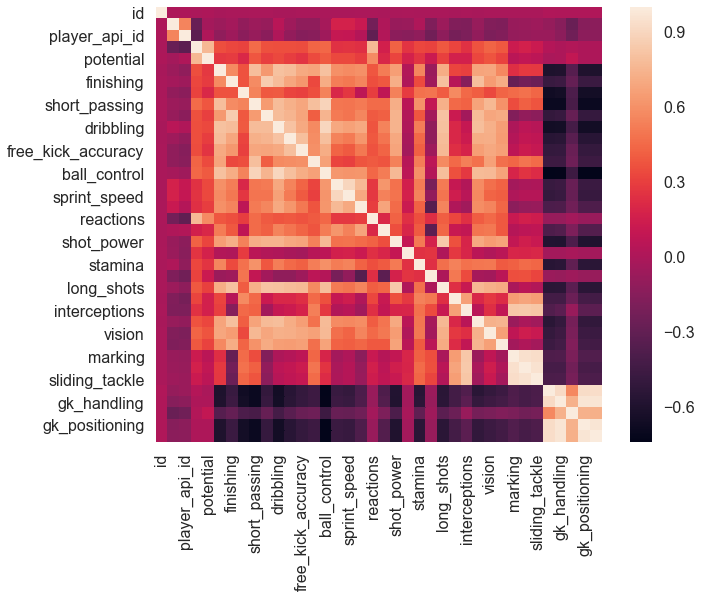

In [54]:
# Show the Coorelations in Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

<b>Observation 1:</b> All variables are positively corelated with Overall Rating except id, player_fifa_api_id, player_api_id. So these variables can be removed from the Regression Model.

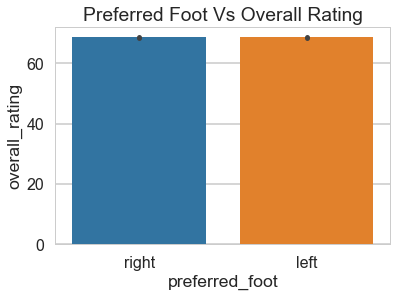

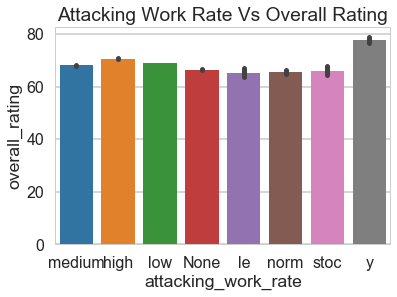

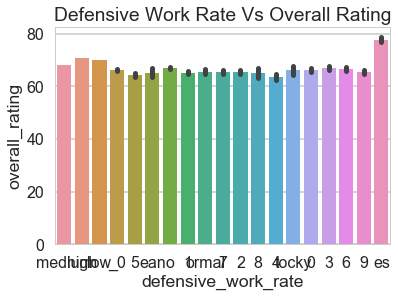

In [55]:
# Checking impact of Categorical Columns

# Impact of Preferred Foot.
sns.barplot(x='preferred_foot', y='overall_rating', data=df, estimator=np.mean)
plt.title('Preferred Foot Vs Overall Rating')
plt.show()

# Impact of Attacking Work Rate.
sns.barplot(x='attacking_work_rate', y='overall_rating', data=df, estimator=np.mean)
plt.title('Attacking Work Rate Vs Overall Rating')
plt.show()

# Impact of Defensive Work Rate.
sns.barplot(x='defensive_work_rate', y='overall_rating', data=df, estimator=np.mean)
plt.title('Defensive Work Rate Vs Overall Rating')
plt.show()

<b>Observation 2:</b> Here the Overall Rating is almost same for the different values of preferred_foot, attacking_work_rate, defensive_work_rate. So these variables can be removed from the Regression Model

<h3>Data Cleaning</h3>

In [56]:
#Check for any NA’s in the dataframe.
df.isnull().values.any()
# Null check
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [57]:
#Drop the rows where at least one element is missing.
df1 = df.dropna() 

In [58]:
#Return a tuple representing the dimensionality of the DataFrame df1.
df1.shape 

(180354, 42)

In [59]:
#Columns of dataframe df1
df1.columns 

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [60]:
# Null check
df1.isnull().sum(axis=0)

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [61]:
#Return a tuple representing the dimensionality of the DataFrame df1.
df1.shape 

(180354, 42)

In [62]:
# Identifying Indipendant variables for the Model
target = ['overall_rating']            # Target variable

# To Identify the feature first we will take all column in the list then remove 
# which is not relivant (as per Observation-1 and Observation-2)
features = list(df1)

features.remove('overall_rating')      # Removed as - Target Variable
features.remove('id')                  # Removed as - Observation 1
features.remove('player_fifa_api_id')  # Removed as - Observation 1
features.remove('player_api_id')       # Removed as - Observation 1
features.remove('date')                # Removed as - Observation 1

features.remove('preferred_foot')      # Removed as - Observation 2
features.remove('attacking_work_rate') # Removed as - Observation 2
features.remove('defensive_work_rate') # Removed as - Observation 2

# now the list features has Columns to be considered for Indipendant variables.
features

['potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [63]:
# Create Data Frame for both Target and Independant Variables.
X=df1[features]
Y=df1[target]

# Create a Model and Analyze stats
model = statsmodels.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.198e+06
Date:                Tue, 20 Nov 2018   Prob (F-statistic):               0.00
Time:                        23:08:45   Log-Likelihood:            -4.4209e+05
No. Observations:              180354   AIC:                         8.842e+05
Df Residuals:                  180320   BIC:                         8.846e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
potential              0.3557      0.001    263.154      0.000       0.353       0.358
crossing               0.0221      0.001     26.238      0.000       0.020       0.024
finishing              0.0100      0.001     10.832      0.000       0.008       0.012
heading_accuracy       0.0667      0.001     81.261      0.000       0.065       0.068
short_passing          0.0460      0.001     33.197      0.000       0.043       0.049
volleys                0.0048      0.001      5.771      0.000       0.003       0.006
dribbling             -0.0127      0.001    -10.801      0.000      -0.015      -0.010
curve                  0.0112      0.001     13.877      0.000       0.010       0.013
free_kick_accuracy     0.0109      0.001     15.233      0.000       0.009       0.012
long_passing           0.0080      0.001      8.369      0.000       0.006       0.010
ball_control           0.1359      0.002     84.966      0.000       0.133       0.139
acceleration           0.0059      0.001      4.240      0.000       0.003       0.009
sprint_speed           0.0071      0.001      5.351      0.000       0.004       0.010
agility               -0.0150      0.001    -14.819      0.000      -0.017      -0.013
reactions              0.2149      0.001    197.780      0.000       0.213       0.217
balance                0.0009      0.001      1.229      0.219      -0.001       0.002
shot_power             0.0172      0.001     19.413      0.000       0.015       0.019
jumping                0.0146      0.001     19.848      0.000       0.013       0.016
stamina               -0.0060      0.001     -7.350      0.000      -0.008      -0.004
strength               0.0504      0.001     63.409      0.000       0.049       0.052
long_shots            -0.0116      0.001    -12.548      0.000      -0.013      -0.010
aggression             0.0208      0.001     30.087      0.000       0.019       0.022
interceptions          0.0142      0.001     19.106      0.000       0.013       0.016
positioning           -0.0081      0.001    -10.202      0.000      -0.010      -0.007
vision                -0.0012      0.001     -1.326      0.185      -0.003       0.001
penalties              0.0137      0.001     18.085      0.000       0.012       0.015
marking                0.0307      0.001     27.118      0.000       0.028       0.033
standing_tackle        0.0037      0.001      2.789      0.005       0.001       0.006
sliding_tackle        -0.0297      0.001    -26.719      0.000      -0.032      -0.028
gk_diving              0.1624      0.001    110.000      0.000       0.160       0.165
gk_handling            0.0292      0.002     15.130      0.000       0.025       0.033
gk_kicking            -0.0314      0.001    -50.077      0.000      -0.033      -0.030
gk_positioning         0.0511      0.0

<b>Observation 3:</b>

R-squared = 0.998 i.e. 99.80% . So the Model can be considered as Perfect
For only Balance and Vision, P Values is greater than 0.05. So this two Variables are impacting on Overall Rating

<b>Train and Test Split</b>
Train Set 70%, Test Set 30%

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
print('X_train:\t',X_train.shape)
print('Y_train:\t',Y_train.shape)
print('X_test:\t\t',X_test.shape)
print('Y_test:\t\t',Y_test.shape)

X_train:	 (126247, 34)
Y_train:	 (126247, 1)
X_test:		 (54107, 34)
Y_test:		 (54107, 1)


In [65]:
# Linear Regression 
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
pd.DataFrame({'Colum_name':X_train.columns,'Coefcient':model_lr.coef_[0]}) # show Coefcient

,Colum_name,Coefcient
0,potential,0.377722
1,crossing,0.022823
2,finishing,0.011733
3,heading_accuracy,0.068611
4,short_passing,0.050309
5,volleys,0.003980
6,dribbling,-0.012641
7,curve,0.011396
8,free_kick_accuracy,0.011499
9,long_passing,0.006797


<h4>Evaluate Model Performance</h4>
<h5>Score</h5>

In [66]:
print('Train:\t',model_lr.score(X_train,Y_train))
print('Test:\t',model_lr.score(X_test,Y_test))

Train:	 0.8414469429891788
Test:	 0.8422874996117334


<b>Conclusion:</b> Model Score is almost same for Test and Train. i.e. the fit is good.

<h4>Overall rating Prediction</h4>

In [67]:
# Calcualte Prediction for Train and Test Data set
y_prediction_train= model_lr.predict(X_train)
y_prediction_test = model_lr.predict(X_test)

print('Train:\t',y_prediction_train.mean())
print('Test:\t', y_prediction_test.mean())

Train:	 68.62899712468413
Test:	 68.62829711367809


<b>Conclusion:</b> Overall rating Prediction is almost same for Test and Train. i.e. the fit is good.

<h3>Prediction for RMSE</h3>

In [68]:
print('Train:\t', math.sqrt(mean_squared_error(y_prediction_train, Y_train)))
print('Test:\t' , math.sqrt(mean_squared_error(y_prediction_test, Y_test)))

Train:	 2.7972742920158433
Test:	 2.7936880375643716


Plot using Train Data with Residual

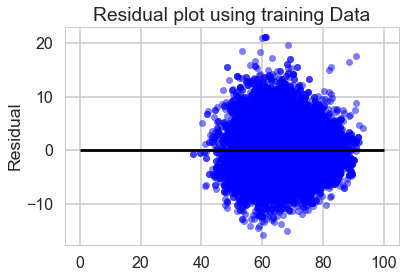

Text(0,0.5,'Residual')

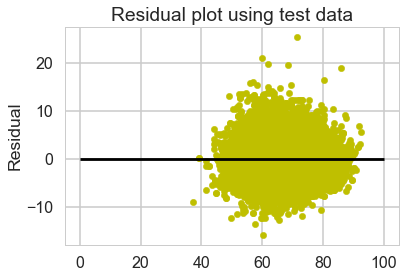

In [69]:
#plt.scatter(model_reg.predict(X_train),model_reg.predict(X_train)-Y_train,c='b',s=40,alpha=0.5)
plt.scatter(y_prediction_train,(y_prediction_train-Y_train),c='b',s=40,alpha=0.5)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual plot using training Data')
plt.ylabel('Residual')
plt.show()

#Plot using Test Data with caluclated Residual
plt.scatter(y_prediction_test,(y_prediction_test-Y_test),c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual plot using test data')
plt.ylabel('Residual')

<b>Conclusion:</b>
The residual are randomly scattered around line zero (for both Train and Test Dataset), so the Model is Perfect and Ready to use.

Now we will Predict Rating for a player to know overall rating by passing the features.

In [70]:
# For the inut feature we are getting feature of an random player and passing the feature 
# to get the overall rating (later we can compare with his rating as we know his rating here)
input_feature = features[:]
pred_overall_rating=model_lr.predict(np.array(df1[input_feature][999:1000]))
print('Predicted Overall Rating:\t', pred_overall_rating)
print('Actual Overall Rating:\t\t', df1['overall_rating'][999:1000].values[0])

Predicted Overall Rating:	 [[58.48234074]]
Actual Overall Rating:		 61.0


<h3>Predicting overall_rating using Test Data</h3>

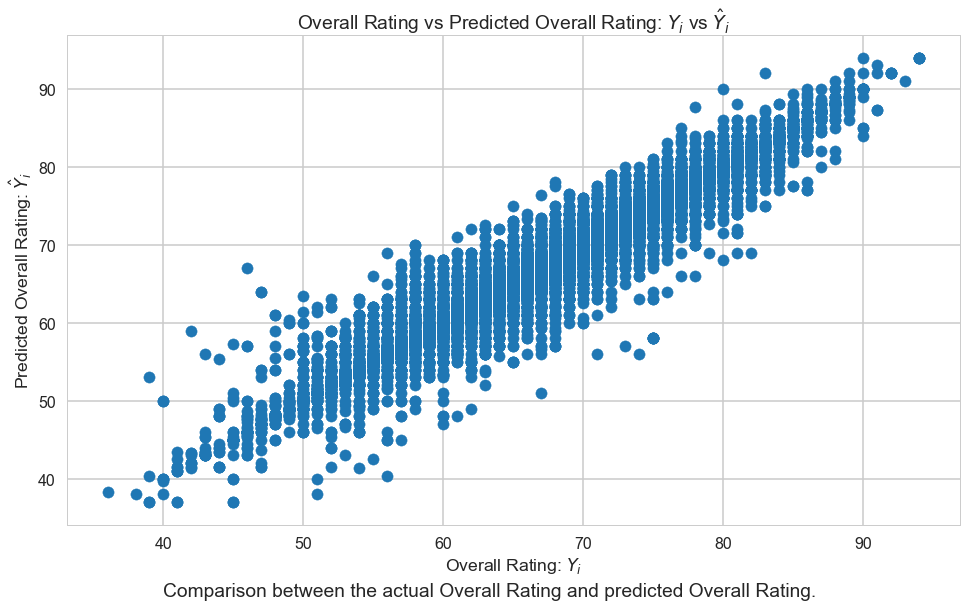

In [71]:
#To visualize the differences between actual overall rating and predicted values, creating a scatter plot.
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(16,9))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Overall Rating: $Y_i$")
plt.ylabel("Predicted Overall Rating: $\hat{Y}_i$")
plt.title("Overall Rating vs Predicted Overall Rating: $Y_i$ vs $\hat{Y}_i$")
plt.text(40,25, "Comparison between the actual Overall Rating and predicted Overall Rating.", ha='left')
plt.show()

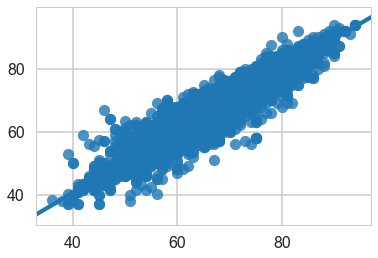

In [72]:
sns.regplot(Y_test, Y_pred, data=df1, fit_reg=True) #Plot Y_test and Y_pred for Linear Regression Model.

Model Evaluation Using Cross-Validation

In [73]:
#Evaluating the model using 10-fold cross-validation
scores = cross_val_score(LinearRegression(), X, Y, scoring='neg_mean_squared_error', cv=10)
scores

array([-7.93511758, -7.72122749, -7.70948306, -7.82193493, -7.66450703,
       -8.23194336, -7.65735506, -7.90798152, -8.00471306, -7.85207381])

In [74]:
np.sqrt(scores.mean() * -1)

2.801898229945487

In [75]:
print("The Root Mean Square Error using cross validation for the Model is "+ str(np.sqrt(scores.mean() * -1)) +" and the Results can be further improved using feature extraction and rebuilding, training the model.")

The Root Mean Square Error using cross validation for the Model is 2.801898229945487 and the Results can be further improved using feature extraction and rebuilding, training the model.


Evaluating the Model Using RMSE

In [76]:
#Calculating Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred) #Mean Squared Error: To check the level of error of a model
print(mse)

2.0104024955883375


In [77]:
#Calculating Root Mean Squared Error#Calcula 
rmse = mse ** 0.5 #Square root of mse (Mean Squared Error)
print(rmse)

1.4178866300195998


In [78]:
print("The Root Mean Square Error (RMSE) for the Model is "+ str(rmse) +" and the Results can be further improved using feature extraction and rebuilding, training the model.")

The Root Mean Square Error (RMSE) for the Model is 1.4178866300195998 and the Results can be further improved using feature extraction and rebuilding, training the model.
